In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('census.csv', delimiter=';')
df

,Name,Total,rel_foreign,rel_women
0,"Flensburg, Stadt",95016,0.154944,0.507088
1,"Kiel, Landeshauptstadt",249126,0.122734,0.511028
2,"Lübeck, Hansestadt",215952,0.113522,0.520161
3,"Neumünster, Stadt",79622,0.119133,0.504358
4,"Brunsbüttel, Stadt",12579,0.091784,0.498012
...,...,...,...,...
10780,Göpfersdorf,219,0.013953,0.493088
10781,Langenleuba-Niederhain,1728,0.003484,0.490708
10782,Nobitz,7018,0.008116,0.500855
10783,Dobitschen,411,0.011962,0.500000


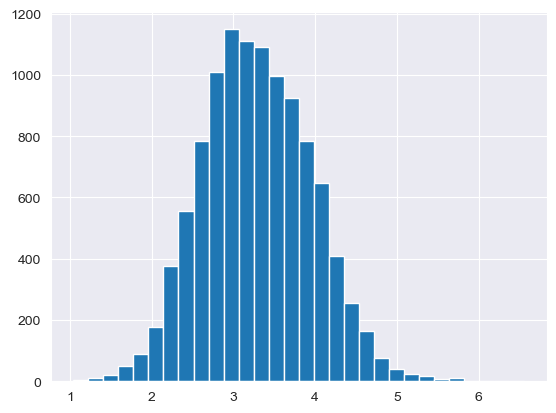

In [3]:
log_data = np.log10(df['Total'])
plt.hist(log_data,bins=30)
plt.show()

In [4]:
import seaborn as sns

log_data = np.log10(df['Total'])


plt.figure(figsize=(10, 6))
sns.histplot(log_total, bins=30, kde=True, color='skyblue', edgecolor='white')
ticks = [0, 1, 2, 3, 4, 5, 6]

labels = ['1', '10', '100', '1k', '10k', '100k', '1M']



plt.xlabel("Number of Inhabitants")
plt.ylabel("Number of Gemeinden")
plt.title("Distribution of Population Sizes Across German Gemeinden (2022)")
plt.xticks(ticks, labels)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

NameError: name 'log_total' is not defined

<Figure size 1000x600 with 0 Axes>

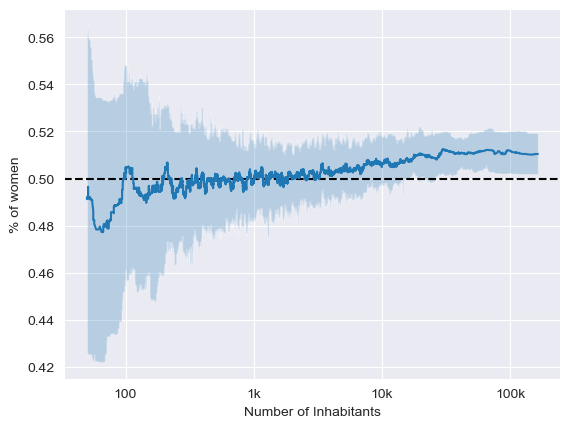

In [58]:
w = 100
roll = df.sort_values('Total')['rel_women'].rolling(w, center=True)
q10 = roll.quantile(0.10)
q90 = roll.quantile(0.90)
med = roll.quantile(0.50)
x = df['Total'].sort_values()
plt.xscale('log'); plt.axhline(.5, ls='--', c='k')

ticks = [1, 10, 100, 1000, 10000, 100000, 1000000]

plt.xlabel("Number of Inhabitants")
plt.ylabel("% of women")
plt.xticks(ticks, labels)

plt.fill_between(x, q10, q90, alpha=.25)
plt.plot(x, med)
plt.show()

C:\Users\dadoi\AppData\Local\Temp\ipykernel_9544\4118265104.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for color, (label, g) in zip(palette, df.groupby('pop_bin')):


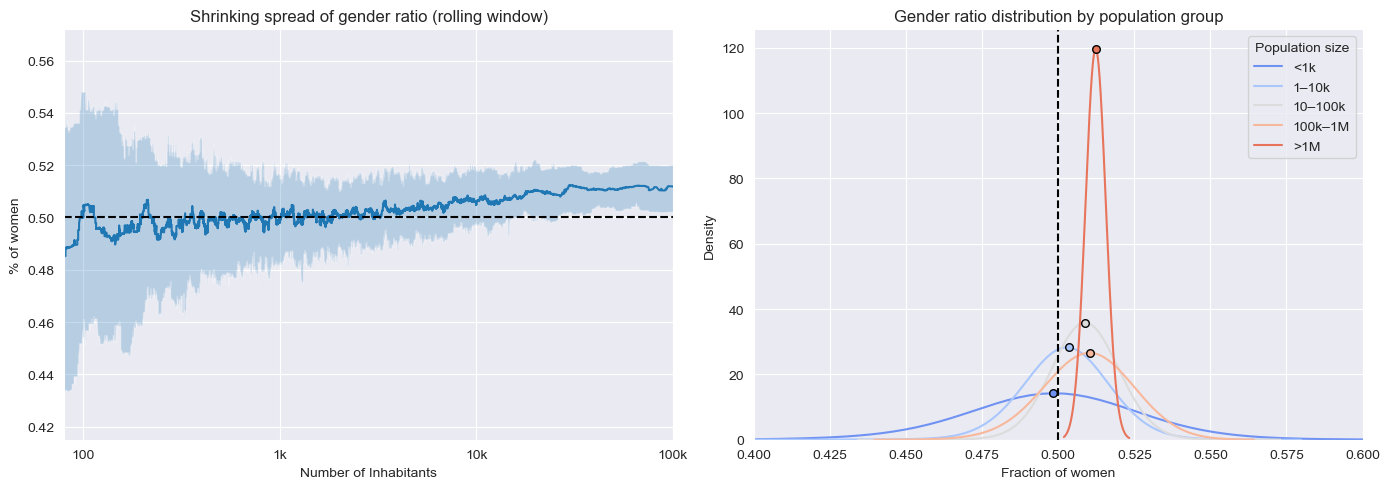

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -- Shared setup
bins   = [1, 1e3, 1e4, 1e5, 1e6, np.inf]
labels = ['1', '10', '100', '1k', '10k', '100k', '1M']
group_labels = ['<1k', '1–10k', '10–100k', '100k–1M', '>1M']
df['pop_bin'] = pd.cut(df['Total'], bins=bins, labels=group_labels)
palette = sns.color_palette("coolwarm", len(group_labels))

fig, axs = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 cols

# --- Subplot 1: Rolling quantile band
d = df.sort_values('Total').reset_index(drop=True)
w = 100
roll = d['rel_women'].rolling(w, center=True)
q10 = roll.quantile(0.10)
q90 = roll.quantile(0.90)
med = roll.quantile(0.50)

axs[0].fill_between(d['Total'], q10, q90, alpha=.25)
axs[0].plot(d['Total'], med)
axs[0].axhline(.5, ls='--', c='k')
axs[0].set_xscale('log')
axs[0].set_xticks([1, 10, 100, 1_000, 10_000, 100_000, 1_000_000])
axs[0].set_xlim(80, 100000)
axs[0].set_xticklabels(labels)
axs[0].set_xlabel('Number of Inhabitants')
axs[0].set_ylabel('% of women')
axs[0].set_title('Shrinking spread of gender ratio (rolling window)')

# --- Subplot 2: KDE per group + mode markers
for color, (label, g) in zip(palette, df.groupby('pop_bin')):
    line = sns.kdeplot(g['rel_women'], bw_adjust=4, clip=(0, 1),
                       color=color, label=label, common_norm=False, ax=axs[1])
    x, y = line.get_lines()[-1].get_data()
    mode_x = x[np.argmax(y)]
    axs[1].scatter(mode_x, y.max(), color=color, edgecolor='k', zorder=3, s=30)

axs[1].axvline(0.5, ls='--', c='k')
axs[1].set_xlim(0.4, 0.6)
axs[1].set_xlabel('Fraction of women')
axs[1].set_ylabel('Density')
axs[1].set_title('Gender ratio distribution by population group')
axs[1].legend(title='Population size')

plt.tight_layout()
plt.show()


C:\Users\dadoi\AppData\Local\Temp\ipykernel_9544\159944422.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for color, (label, g) in zip(palette, df.groupby('pop_bin')):


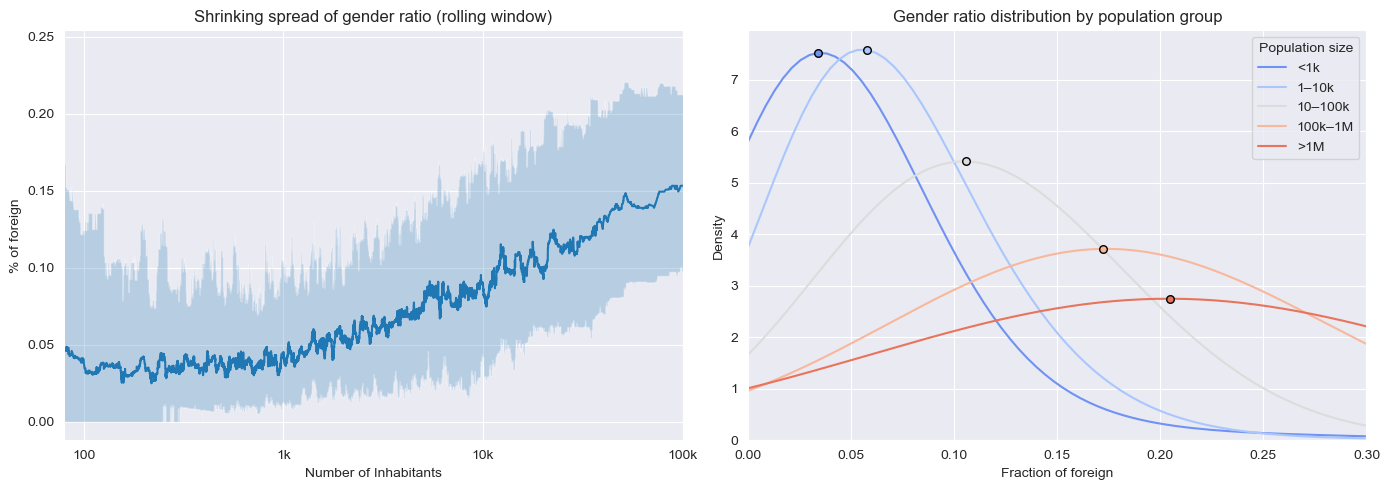

In [22]:

# -- Shared setup
bins   = [1, 1e3, 1e4, 1e5, 1e6, np.inf]
labels = ['1', '10', '100', '1k', '10k', '100k', '1M']
group_labels = ['<1k', '1–10k', '10–100k', '100k–1M', '>1M']
df['pop_bin'] = pd.cut(df['Total'], bins=bins, labels=group_labels)
palette = sns.color_palette("coolwarm", len(group_labels))

fig, axs = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 cols

# --- Subplot 1: Rolling quantile band
d = df.sort_values('Total').reset_index(drop=True)
w = 100
roll = d['rel_foreign'].rolling(w, center=True)
q10 = roll.quantile(0.10)
q90 = roll.quantile(0.90)
med = roll.quantile(0.50)

axs[0].fill_between(d['Total'], q10, q90, alpha=.25)
axs[0].plot(d['Total'], med)
axs[0].set_xscale('log')
axs[0].set_xticks([1, 10, 100, 1_000, 10_000, 100_000, 1_000_000])
axs[0].set_xticklabels(labels)
axs[0].set_xlim(80, 100000)

axs[0].set_xlabel('Number of Inhabitants')
axs[0].set_ylabel('% of foreign')
axs[0].set_title('Shrinking spread of gender ratio (rolling window)')

# --- Subplot 2: KDE per group + mode markers
for color, (label, g) in zip(palette, df.groupby('pop_bin')):
    line = sns.kdeplot(g['rel_foreign'], bw_adjust=4, clip=(0, 1),
                       color=color, label=label, common_norm=False, ax=axs[1])
    x, y = line.get_lines()[-1].get_data()
    mode_x = x[np.argmax(y)]
    axs[1].scatter(mode_x, y.max(), color=color, edgecolor='k', zorder=3, s=30)

axs[1].axvline(0.5, ls='--', c='k')
axs[1].set_xlim(0.0, 0.3)
axs[1].set_xlabel('Fraction of foreign')
axs[1].set_ylabel('Density')
axs[1].set_title('Gender ratio distribution by population group')
axs[1].legend(title='Population size')

plt.tight_layout()
plt.show()
